In [24]:
# Check TensorFlow version (should be 2.4.0+)
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
import urllib.request

2.4.1


In [2]:
from utils import load_and_prep_image, make_confusion_matrix, pred_and_plot

In [8]:
loaded_model = tf.keras.models.load_model("../models/food_130_app_tuned_v2")
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 130)               166530    
Total params: 4,216,101
Trainable params: 4,174,078
Non-trainable params: 42,023
_________________________________________________________________


In [9]:
class_names = ['apple_pie',
 'baby_back_ribs',
 'baklava',
 'banh_beo',
 'banh_bot_loc',
 'banh_can',
 'banh_canh',
 'banh_chung',
 'banh_cuon',
 'banh_duc',
 'banh_gio',
 'banh_khot',
 'banh_mi',
 'banh_pia',
 'banh_tet',
 'banh_trang_nuong',
 'banh_xeo',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'bun_bo_hue',
 'bun_dau_mam_tom',
 'bun_mam',
 'bun_rieu',
 'bun_thit_nuong',
 'ca_kho_to',
 'caesar_salad',
 'canh_chua',
 'cannoli',
 'cao_lau',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'chao_long',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'com_tam',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'goi_cuon',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'hu_tieu',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'macarons',
 'mi_quang',
 'miso_soup',
 'mussels',
 'nachos',
 'nem_chua',
 'omelette',
 'onion_rings',
 'oysters',
 'pad_thai',
 'paella',
 'pancakes',
 'panna_cotta',
 'peking_duck',
 'pho',
 'pizza',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ramen',
 'ravioli',
 'red_velvet_cake',
 'risotto',
 'samosa',
 'sashimi',
 'scallops',
 'seaweed_salad',
 'shrimp_and_grits',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'takoyaki',
 'tiramisu',
 'tuna_tartare',
 'waffles',
 'xoi_xeo']

In [27]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/RedDot_Burger.jpg/1280px-RedDot_Burger.jpg'

In [28]:
urllib.request.urlretrieve(url, './img.jpg')

('./img.jpg', <http.client.HTTPMessage at 0x25148213be0>)

In [31]:
list(pred_prob[0]).index(sorted(pred_prob[0])[-2])

63

In [33]:
sorted(pred_prob[0])[-2]

0.055576816

In [32]:
class_names[63]

'foie_gras'

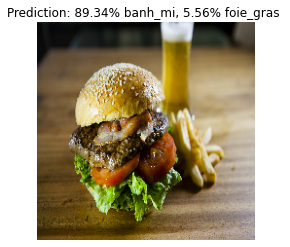

In [36]:
# Make predictions on custom food images

img = load_and_prep_image("img.jpg", scale=False) # load in target image and turn it into tensor
pred_prob = loaded_model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
pred_class = class_names[pred_prob.argmax()] # find the predicted class label
second_pred_prob = sorted(pred_prob[0])[-2]
second_pred_index = list(pred_prob[0]).index(sorted(pred_prob[0])[-2])
second_pred_class_name = class_names[second_pred_index]
# Plot the image with appropriate annotations
plt.figure()
plt.imshow(img/255.); # imshow() requires float inputs to be normalized
plt.title(f"Prediction: {pred_prob.max()*100:.2f}% {pred_class}, {second_pred_prob*100:.2f}% {second_pred_class_name} ")
plt.axis(False);

In [37]:
loaded_model.save("model.h5")

In [38]:
loaded_model_h5 = tf.keras.models.load_model("model.h5")
loaded_model_h5.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 130)               166530    
Total params: 4,216,101
Trainable params: 4,174,078
Non-trainable params: 42,023
_________________________________________________________________
